# BUSA 710 Case Study on Association Rule Mining
### Fashion Store Customer Purchase Analysis	


# loading and basic data set exploration 

In [137]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
# Load the data set.
df = pd.read_csv("/Users/harshchandak/Downloads/FashionStoreData.csv")
df.head(10)# check the first ten rows 

,T-shirt,Jeans,Sneakers,Blouse,Skirt,Heels,Jacket,Scarf,Ankle Boots,Handbag,...,Sweater,Leggings,Dress,Cardigan,Boots,Shorts,Flip Flops,Coat,Belt,Pants
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [8]:
df.shape

(10000, 21)

In [10]:
df_new=df.copy()# we need to make a copy beacuse we dont want to modify the original dataframe

In [12]:
df_new.head()

,T-shirt,Jeans,Sneakers,Blouse,Skirt,Heels,Jacket,Scarf,Ankle Boots,Handbag,...,Sweater,Leggings,Dress,Cardigan,Boots,Shorts,Flip Flops,Coat,Belt,Pants
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,1,0,0,0


In [14]:
# To see all the columns properly
df.head().T

,0,1,2,3,4
T-shirt,1,0,1,0,0
Jeans,0,1,0,1,0
Sneakers,0,1,1,0,0
Blouse,0,1,0,0,0
Skirt,0,0,0,0,0
Heels,0,1,0,1,0
Jacket,1,1,0,0,0
Scarf,0,0,0,1,0
Ankle Boots,0,0,0,0,1
Handbag,0,1,0,0,0


In [16]:
# Support for single item
print(df_new.mean())

T-shirt        0.3696
Jeans          0.3065
Sneakers       0.2487
Blouse         0.2675
Skirt          0.1832
Heels          0.2405
Jacket         0.1420
Scarf          0.1684
Ankle Boots    0.2036
Handbag        0.2619
Sunglasses     0.1518
Sweater        0.2273
Leggings       0.1494
Dress          0.2154
Cardigan       0.1667
Boots          0.1922
Shorts         0.1876
Flip Flops     0.1296
Coat           0.1671
Belt           0.2342
Pants          0.2293
dtype: float64


Below is a detailed breakdown of each product’s support value:
* T-shirt (0.3696): Approximately 36.96% of all transactions include a T-shirt, indicating a strong market presence.
* Jeans (0.3065): Roughly 30.65% of transactions feature jeans, highlighting them as a consistently popular item.
* Sneakers (0.2487): About 24.87% of transactions include sneakers, showing a solid customer demand.
* Blouse (0.2675): Nearly 26.75% of transactions contain a blouse, reflecting a notable frequency in purchases.
* Skirt (0.1832): Around 18.32% of transactions include a skirt, suggesting moderate market penetration.
* Heels (0.2405): Approximately 24.05% of transactions feature heels, indicating a steady presence in sales.
* Jacket (0.1420): Nearly 14.20% of transactions include a jacket, which might call for targeted strategies to boost sales.
* Scarf (0.1684): About 16.84% of transactions include a scarf, representing a moderate level of customer interest.
* Ankle Boots (0.2036): Roughly 20.36% of transactions feature ankle boots, showing a decent uptake among buyers.
* Handbag (0.2619): Approximately 26.19% of transactions include a handbag, marking it as a frequently purchased accessory.
* Sunglasses (0.1518): Nearly 15.18% of transactions include sunglasses, pointing to a more niche segment.
* Sweater (0.2273): About 22.73% of transactions include a sweater, reflecting steady performance.
* Leggings (0.1494): Approximately 14.94% of transactions feature leggings, which may benefit from enhanced promotional efforts.
* Dress (0.2154): Around 21.54% of transactions include a dress, signaling a consistent demand.
* Cardigan (0.1667): Roughly 16.67% of transactions include a cardigan, indicating a moderate customer interest.
* Boots (0.1922): About 19.22% of transactions include boots, showing a solid but not dominant share.
* Shorts (0.1876): Approximately 18.76% of transactions feature shorts, suggesting a healthy transaction share
* Flip Flops (0.1296): Around 12.96% of transactions include flip flops, which are on the lower end of prevalence.
* Coat (0.1671): Nearly 16.71% of transactions feature a coat, representing a moderate support level.
* Belt (0.2342): Approximately 23.42% of transactions include a belt, indicating strong performance as an accessory.
* Pants (0.2293): About 22.93% of transactions include pants, reflecting a robust presence in the market.

High-Frequency Items: Products like T-shirts (36.96%), Jeans (30.65%), and blouse (26.75%) are frequently purchased. This indicates strong customer interest and market traction.

Basic Metrics
Computing support for Single Items

Since Support (X) = Frequency (X)/N, Support for single items would be the mean of occurence of each item in the data frame (In one-hot encoded data, the values are 0 or 1, so mean function calculates the percentage of 1


In [22]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
T-shirt,10000.0,0.3696,0.482721,0.0,0.0,0.0,1.0,1.0
Jeans,10000.0,0.3065,0.461063,0.0,0.0,0.0,1.0,1.0
Sneakers,10000.0,0.2487,0.432281,0.0,0.0,0.0,0.0,1.0
Blouse,10000.0,0.2675,0.442677,0.0,0.0,0.0,1.0,1.0
Skirt,10000.0,0.1832,0.386850,0.0,0.0,0.0,0.0,1.0
Heels,10000.0,0.2405,0.427408,0.0,0.0,0.0,0.0,1.0
Jacket,10000.0,0.1420,0.349068,0.0,0.0,0.0,0.0,1.0
Scarf,10000.0,0.1684,0.374240,0.0,0.0,0.0,0.0,1.0
Ankle Boots,10000.0,0.2036,0.402695,0.0,0.0,0.0,0.0,1.0
Handbag,10000.0,0.2619,0.439690,0.0,0.0,0.0,1.0,1.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   T-shirt      10000 non-null  int64
 1   Jeans        10000 non-null  int64
 2   Sneakers     10000 non-null  int64
 3   Blouse       10000 non-null  int64
 4   Skirt        10000 non-null  int64
 5   Heels        10000 non-null  int64
 6   Jacket       10000 non-null  int64
 7   Scarf        10000 non-null  int64
 8   Ankle Boots  10000 non-null  int64
 9   Handbag      10000 non-null  int64
 10  Sunglasses   10000 non-null  int64
 11  Sweater      10000 non-null  int64
 12  Leggings     10000 non-null  int64
 13  Dress        10000 non-null  int64
 14  Cardigan     10000 non-null  int64
 15  Boots        10000 non-null  int64
 16  Shorts       10000 non-null  int64
 17  Flip Flops   10000 non-null  int64
 18  Coat         10000 non-null  int64
 19  Belt         10000 non-null  int64
 20  Pants  

## EDA- data exploration and viz

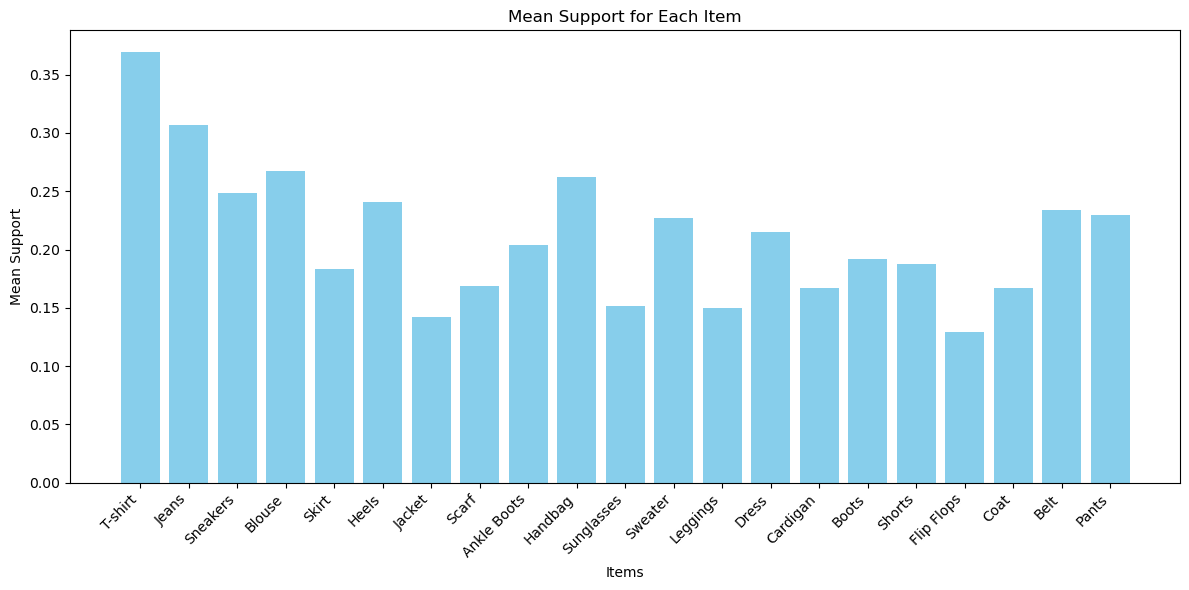

In [153]:
# all the columns are non null 
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the mean support for each item (each column)
mean_support = df.mean()

# Create a bar chart: x-axis = item names, y-axis = mean support values
plt.figure(figsize=(12, 6))
plt.bar(mean_support.index, mean_support.values, color='skyblue')
plt.xlabel('Items')
plt.ylabel('Mean Support')
plt.title('Mean Support for Each Item')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

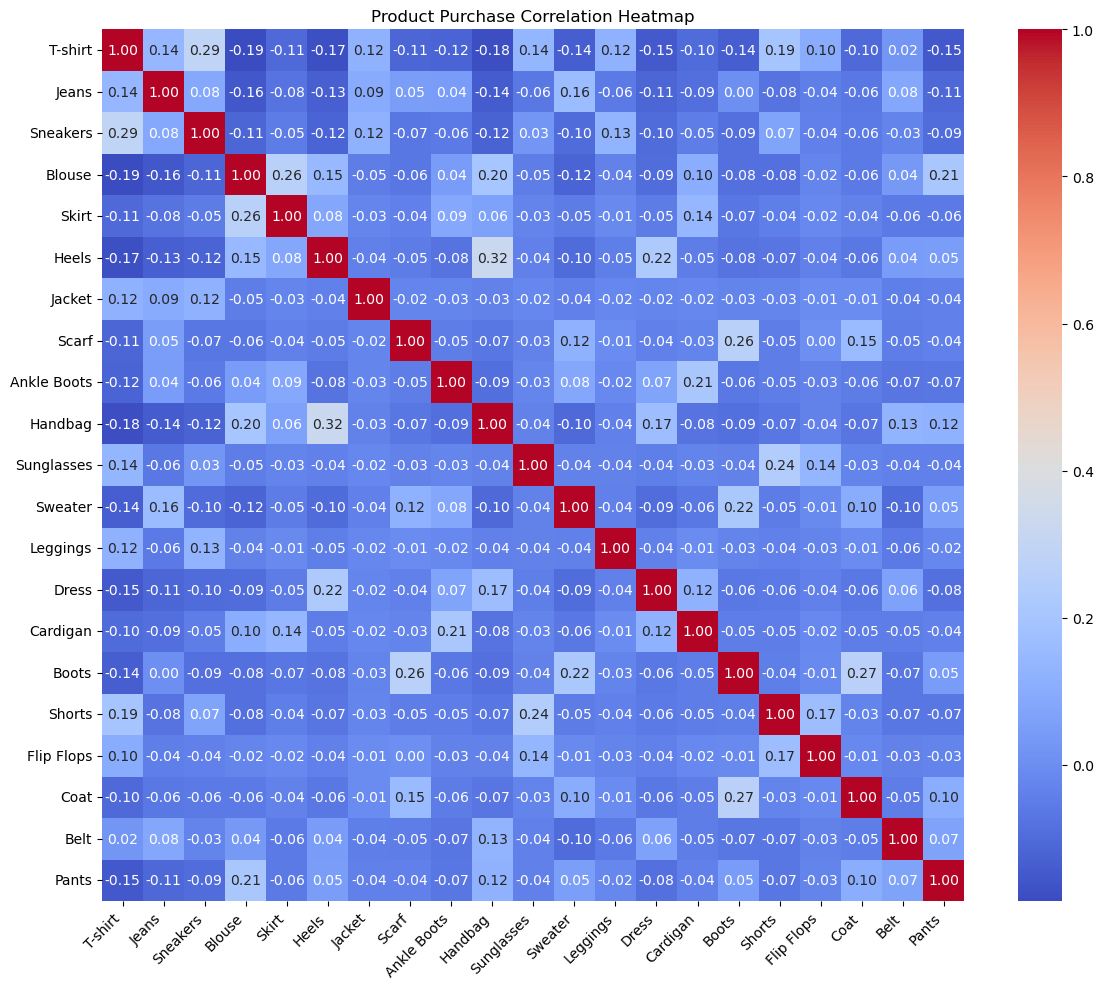

In [175]:
# Calculate the correlation matrix for the products
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Product Purchase Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## we can also see how two things are correlated 
###  we can see the highest correaltion is between handbag and heels 


In [28]:
df_new=df_new.astype(bool)# we change it from binary to bool to carry out our asm

In [30]:
df_new.head()

,T-shirt,Jeans,Sneakers,Blouse,Skirt,Heels,Jacket,Scarf,Ankle Boots,Handbag,...,Sweater,Leggings,Dress,Cardigan,Boots,Shorts,Flip Flops,Coat,Belt,Pants
0,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,True,True,True,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,True,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,False,...,False,True,True,True,False,False,True,False,False,False


# Applying Apriori algorithm
### We generate frequent itemsets, by defining that itemsets should have a minimum support of 0.2

In [94]:
# Computing frequent itemsets
frequent_itemsets = apriori(df_new, min_support=0.01, use_colnames=True)# by checking different support values .05 seems like a good staring option 

In [98]:
print(len(frequent_itemsets))

533


In [100]:
print(frequent_itemsets.sample(10))

     support                      itemsets
35    0.0452              (Boots, T-shirt)
8     0.2036                 (Ankle Boots)
212   0.0193        (Cardigan, Flip Flops)
381   0.0101  (Sweater, Jeans, Flip Flops)
400   0.0387        (Blouse, Heels, Skirt)
301   0.0135     (Pants, T-shirt, Handbag)
401   0.0320  (Ankle Boots, Blouse, Skirt)
64    0.0311             (Sneakers, Scarf)
266   0.0310     (Sneakers, T-shirt, Belt)
187   0.0330              (Sweater, Dress)


In [102]:
# Computing Association Rules
Rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)#

Association Rules Generation:
#### The code applies the Apriori algorithm using the association_rules function to the previously generated frequent_itemsets. The key parameter here is metric="confidence" with a min_threshold=0.1, meaning that only rules with a confidence of at least 10% are retained.

In [218]:
Rules.sort_values(by='confidence',ascending=False).head()



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1451,"(Shorts, Sunglasses, Flip Flops)",(T-shirt),0.0256,0.3696,0.0227,0.886719,2.399131,1.0,0.013238,5.564910,0.598504,0.060940,0.820303,0.474068
1417,"(Sneakers, Jeans, Jacket)",(T-shirt),0.0300,0.3696,0.0252,0.840000,2.272727,1.0,0.014112,3.940000,0.577320,0.067308,0.746193,0.454091
1452,"(Sunglasses, T-shirt, Flip Flops)",(Shorts),0.0274,0.1876,0.0227,0.828467,4.416136,1.0,0.017560,4.736119,0.795350,0.118045,0.788857,0.474735
1439,"(Shorts, Sunglasses, Sneakers)",(T-shirt),0.0203,0.3696,0.0168,0.827586,2.239140,1.0,0.009297,3.656320,0.564867,0.045028,0.726501,0.436520
1429,"(Sneakers, Jeans, Belt)",(T-shirt),0.0261,0.3696,0.0208,0.796935,2.156209,1.0,0.011153,3.104423,0.550594,0.055481,0.677879,0.426606


Output Breakdown

Each column in the output represents a specific metric that guides your analysis:
* Antecedents & Consequents:
	•	Business Implication: Identifying which product combinations are most common aids in store layout optimization and cross-selling strategies.
	•	Support:
	•	Definition: The proportion of transactions that include both the antecedent and consequent together.
	•	Strategic Value: A higher support value signifies that the rule is relevant and that the product pairing is common among customers.
	•	Confidence:
	•	Definition: The probability that the consequent is purchased when the antecedent is purchased.
	•	Business Application: This metric demonstrates the reliability of the rule. For example, a confidence of 0.392 indicates that approximately 39.2% of the time, Jeans are purchased when a T-shirt is bought.
	•	Lift:
	•	Definition: The ratio of the observed support to that expected if the antecedent and consequent were independent.
	•	Interpretation: A lift greater than 1 (e.g., 1.279) indicates a positive association between products, meaning they are purchased together more frequently than random chance would suggest.

In [235]:
Rules.sort_values(by=["lift"], ascending=False).drop(
    columns=["antecedent support", "consequent support"]
).head(5)

,antecedents,consequents,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1563,"(Pants, Boots)","(Sweater, Coat)",0.0205,0.397287,7.370813,1.0,0.017719,1.569735,0.911356,0.241176,0.362950,0.388810
1560,"(Sweater, Coat)","(Pants, Boots)",0.0205,0.380334,7.370813,1.0,0.017719,1.530502,0.913571,0.241176,0.346620,0.388810
1492,"(Ankle Boots, Skirt)","(Blouse, Cardigan)",0.0216,0.426877,6.918598,1.0,0.018478,1.637172,0.901055,0.238148,0.389191,0.388479
1493,"(Blouse, Cardigan)","(Ankle Boots, Skirt)",0.0216,0.350081,6.918598,1.0,0.018478,1.460798,0.911715,0.238148,0.315442,0.388479
1495,"(Cardigan, Skirt)","(Ankle Boots, Blouse)",0.0216,0.421875,6.782556,1.0,0.018415,1.622141,0.898570,0.235294,0.383531,0.384571


###  what the above code does Sorting by Lift:
The code sorts the association rules in descending order by the “lift” metric. Lift quantifies how much more frequently the antecedent and consequent occur together than would be expected if they were statistically independent. A higher lift indicates a stronger association between the items.

This helps us to understand what items are frequently bought together and thus should be plaaced in the same place
Business Recommendations
## Store Layout Optimization:
* High-lift associations (e.g., (Pants, Boots) → (Sweater, Coat)) suggest frequent co-purchases.
* Position complementary items near each other to drive impulse buys and streamline customer experience.
* Place Pants, Boots, Sweater, and Coat near each other to encourage co-purchases.
* Arrange Ankle Boots, Skirt, Blouse, and Cardigan in close proximity for a seamless shopping experience.
* Group T-shirts, Sunglasses, Shorts, and Flip Flops together to promote associated buying behavior.
## Targeted Promotions and Bundling:
* Use high-confidence, high-lift rules to develop attractive bundle offers.
* Bundling related products can enhance conversion rates and boost average transaction values.
* Develop bundled offers featuring Pants, Boots, Sweater, and Coat to capitalize on their strong association.
*  Create promotional packages for Ankle Boots, Skirt, Blouse, and Cardigan based on their frequent co-purchase pattern.
## Inventory Management:
*  Prioritize stocking for products with strong associations to prevent stockouts.
* Efficient inventory management reduces carrying costs and optimizes supply chain operations.

In [233]:
Rules.sort_values(by=["support"], ascending=False).drop(
    columns=["antecedent support", "consequent support"]
).head(5)

,antecedents,consequents,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(Sneakers),(T-shirt),0.1525,0.613189,1.659060,1.0,0.060580,1.629735,0.528749,0.327394,0.386403,0.512898
3,(T-shirt),(Sneakers),0.1525,0.412608,1.659060,1.0,0.060580,1.279044,0.630154,0.327394,0.218166,0.512898
0,(T-shirt),(Jeans),0.1449,0.392045,1.279104,1.0,0.031618,1.140710,0.346134,0.272779,0.123353,0.432401
1,(Jeans),(T-shirt),0.1449,0.472757,1.279104,1.0,0.031618,1.195653,0.314640,0.272779,0.163637,0.432401
186,(Heels),(Handbag),0.1240,0.515593,1.968662,1.0,0.061013,1.523717,0.647848,0.327696,0.343710,0.494528


### Loyalty Programs with Top Seller Incentives:
Implement a tiered loyalty program that rewards customers for repeated purchases of top sellers i.e  the  items on the list . Offer exclusive discounts, early access to new releases, or bonus points to incentivize customer retention and higher spend.
###  Sneakers & T-shirts:
* With a support value of 15.25%, these items consistently appear together in transactions.
* Implement cross-promotional campaigns and bundled offers to capitalize on this high-selling pair.
###  T-shirts & Jeans:
* At a support level of 14.49%, this pairing is a strong indicator of customer preference.
* Enhance merchandising strategies by featuring these items together in both physical displays and online promotions.
### Heels & Handbags:
* With a support of 12.40%, this combination demonstrates robust sales performance.
* Prioritize inventory and develop targeted promotions to highlight these items.
### Blouse & Handbag:
* With support around 10.97%, the frequent co-purchase of these items presents a valuable opportunity.
* Leverage this association in marketing strategies to drive cross-selling and upsell opportunities in womens section
### T-shirts & Shorts:
* Registering a support of 10.60%, this association suggests a popular casual outfit choice.
* Create seasonal campaigns for summer  and bundle deals to promote these items together and boost overall sales.

In [231]:
Rules.sort_values(by=["confidence"], ascending=False).drop(
    columns=["antecedent support", "consequent support"]
).head(5)

,antecedents,consequents,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1451,"(Shorts, Sunglasses, Flip Flops)",(T-shirt),0.0227,0.886719,2.399131,1.0,0.013238,5.564910,0.598504,0.060940,0.820303,0.474068
1417,"(Sneakers, Jeans, Jacket)",(T-shirt),0.0252,0.840000,2.272727,1.0,0.014112,3.940000,0.577320,0.067308,0.746193,0.454091
1452,"(Sunglasses, T-shirt, Flip Flops)",(Shorts),0.0227,0.828467,4.416136,1.0,0.017560,4.736119,0.795350,0.118045,0.788857,0.474735
1439,"(Shorts, Sunglasses, Sneakers)",(T-shirt),0.0168,0.827586,2.239140,1.0,0.009297,3.656320,0.564867,0.045028,0.726501,0.436520
1429,"(Sneakers, Jeans, Belt)",(T-shirt),0.0208,0.796935,2.156209,1.0,0.011153,3.104423,0.550594,0.055481,0.677879,0.426606


### Confidence tells us how often customers who buy a certain group of items (the “if” part) also buy another specific item or group of items (the “then” part). For instance, if a rule shows that when customers purchase Shorts, Sunglasses, and Flip Flops, they also buy a T-shirt 88.67% of the time, then the confidence of that rule is 88.67%. 
### Store Layout Optimization:
* Insight: High-confidence rules indicate that when certain items are purchased together, the subsequent item is almost always bought.
* Application: For instance,  data shows that customers buying Shorts, Sunglasses, and Flip Flops purchase T-shirts with very high confidence, placing these items near each other in-store can reduce shopping friction and encourage impulse purchases. This clustering creates natural, themed sections a summer essentials corner that enhance the customer experience.
### Targeted Marketing Campaigns and Promotions:
* Insight: Confidence helps identify the most reliable associations, which can be used to craft focused marketing messages.
* Application: Use these patterns to design digital and print promotions. For example, a high-confidence rule shows that Sneakers, Jeans, and Jackets often lead to T-shirt purchases, targeted email campaigns or social media ads can highlight these combinations, encouraging customers to complete the outfit with a T-shirt discount or bundled deal.

In [229]:
# filter rules to have only one consequent
single_rules = Rules[[len(c) == 1 for c in Rules.consequents]]
(
    single_rules.sort_values(by=["lift"], ascending=False)
    .drop(columns=["antecedent support", "consequent support", "conviction"])
    .head(5)
)

,antecedents,consequents,support,confidence,lift,representativity,leverage,zhangs_metric,jaccard,certainty,kulczynski
1452,"(Sunglasses, T-shirt, Flip Flops)",(Shorts),0.0227,0.828467,4.416136,1.0,0.017560,0.795350,0.118045,0.788857,0.474735
1556,"(Sweater, Boots, Pants)",(Coat),0.0205,0.709343,4.245018,1.0,0.015671,0.787179,0.116809,0.651030,0.416012
1449,"(Shorts, T-shirt, Flip Flops)",(Sunglasses),0.0227,0.627072,4.130908,1.0,0.017205,0.786390,0.137326,0.560330,0.388305
1487,"(Ankle Boots, Blouse, Skirt)",(Cardigan),0.0216,0.675000,4.049190,1.0,0.016266,0.777931,0.121965,0.609984,0.402287
1486,"(Ankle Boots, Blouse, Cardigan)",(Skirt),0.0216,0.717608,3.917074,1.0,0.016086,0.767819,0.112676,0.654270,0.417756


## single rules are great for identifying and making rules for promotion 
we can use the above table to identify some rules 
* a shopping cart having t-shirt flip flops - has a high chance of having shorts so we can now put this as a promotional offer 
* in winter we can do the same with coats when we see sweater boots and pants  



### overall business recommendations 
1. seperating by summer(Sunglasses, T-shirt, Flip Flops,Shorts) in one part of the store and winter in another side (Sweater, Boots, Pants,Coat,scarf)
2. Pairing Heels & Handbag together is a good way to increase sales.
3. having promotional offer on  slow moving items like
   * Flip Flops (0.1296): Around 12.96% of transactions include flip flops, indicating they have the lowest market presence.
   * Jacket (0.1420): Nearly 14.20% of transactions include a jacket, suggesting relatively low sales.
   * Leggings (0.1494): Approximately 14.94% of transactions feature leggings.
   * Sunglasses (0.1518): Nearly 15.18% of transactions include sunglasses.
4. Displaying fast moving items at the store front as these sell so these items can attract buyers into the store
   * Blouse (0.2675): Nearly 26.75% of transactions include a blouse.
   * Jeans (0.3065): Around 30.65% of transactions include jeans.
   * T-shirt (0.3696): Approximately 36.96% of transactions include a T-shirt, indicating the highest market presence.